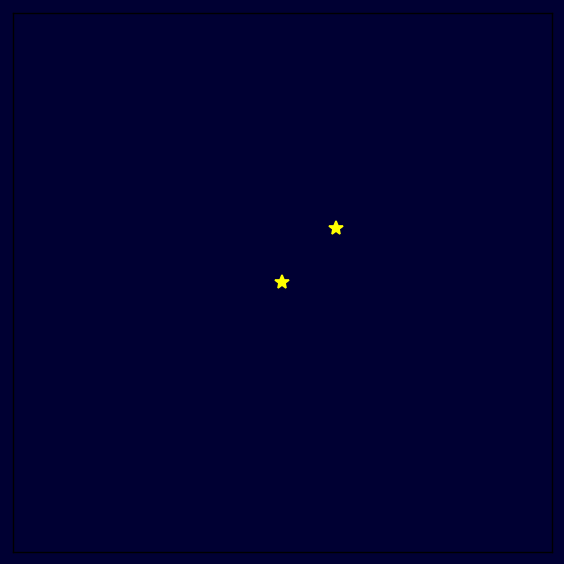

In [3]:
"""
Ramón Llobet Duch
Biel Bernal PRatdesaba

Aquest programa es una simulació de 
"""
import tkinter as tk
from tkinter import ttk, colorchooser
import ttkbootstrap as tb

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

# =========================
# Classe i llista de cossos
# =========================
cossos = []

class CosCeleste:
    def __init__(self, forma, mida, massa, color, pos_x, pos_y, vel_x, vel_y):
        self.forma = forma
        self.mida = mida
        self.massa = massa
        self.color = color
        self.pos_x = pos_x
        self.pos_y = pos_y
        self.vel_x = vel_x
        self.vel_y = vel_y

# ===============================
# Funció per dibuixar els cossos
# ===============================
def dibuixa_tots_els_cossos(ax, canvas):
    ax.clear()
    ax.set_facecolor("#000033")
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    for cos in cossos:
        ax.plot(cos.pos_x, cos.pos_y, marker=cos.forma, markersize=cos.mida, color=cos.color, linestyle='None')

    canvas.draw()

def simulador_gravitacional_ui():
    win = tb.Window(themename="darkly")
    win.title("Simulador de Cuerpos Sometidos a Atracción Gravitatoria")
    win.geometry("1200x700")
    win.configure(bg='black')

    # Menú superior
    menu_bar = tk.Menu(win)
    win.config(menu=menu_bar)

    menu_bar.add_cascade(label="Archivo")
    menu_bar.add_cascade(label="Cuerpos")
    menu_bar.add_cascade(label="Evaluación")
    menu_bar.add_cascade(label="Ayuda")

    # Frame principal horitzontal
    frame_principal = ttk.Frame(win)
    frame_principal.pack(fill='both', expand=True)

    # Àrea de simulació (esquerra)
    frame_canvas = tk.Frame(frame_principal, bg="#000033", width=900, height=700)
    frame_canvas.pack(side='left', fill='both', expand=True)

    fig, ax = plt.subplots(facecolor='#000033')
    ax.set_facecolor("#000033")
    ax.set_title("Simulació")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
    canvas = FigureCanvasTkAgg(fig, master=frame_canvas)
    canvas.get_tk_widget().pack(fill='both', expand=True)

    # Panell de control (dreta)
    frame_controls = ttk.Frame(frame_principal, padding=15)
    frame_controls.pack(side='right', fill='y')

    # Botó crear cos
    ttk.Button(frame_controls, text="Crear Cuerpo", command=lambda: finestra_crear_cos(win, ax, canvas)).pack(pady=10, fill='x')

    # Paràmetres generals
    grup_parametres = ttk.LabelFrame(frame_controls, text="Parámetros Generales")
    grup_parametres.pack(fill='x', pady=10)

    ttk.Label(grup_parametres, text="Constante Gravitatoria:").pack(anchor='w')
    ttk.Scale(grup_parametres, orient='horizontal').pack(fill='x')

    ttk.Label(grup_parametres, text="Reproducción (30.2 fps):").pack(anchor='w', pady=(8, 0))
    ttk.Scale(grup_parametres, orient='horizontal').pack(fill='x')

    ttk.Label(grup_parametres, text="Incremento Temporal:").pack(anchor='w', pady=(8, 0))
    ttk.Scale(grup_parametres, orient='horizontal').pack(fill='x')

    # Color del fons
    ttk.Label(frame_controls, text="Color del fondo galáctico:").pack(anchor='w', pady=(20, 5))
    color_btn = ttk.Entry(frame_controls, width=10)
    color_btn.insert(0, "#000033")
    color_btn.pack(anchor='w')

    def seleccionar_color():
        color = colorchooser.askcolor(initialcolor=color_btn.get())[1]
        if color:
            color_btn.delete(0, 'end')
            color_btn.insert(0, color)
            frame_canvas.config(bg=color)
            fig.patch.set_facecolor(color)
            ax.set_facecolor(color)
            canvas.draw()

    ttk.Button(frame_controls, text="Seleccionar color", command=seleccionar_color).pack(anchor='w', pady=5)

    # Botons d'acció
    frame_botons = ttk.Frame(frame_controls)
    frame_botons.pack(pady=20)

    ttk.Button(frame_botons, text="Inicia", bootstyle="success").pack(side='left', padx=5)
    ttk.Button(frame_botons, text="Reinicia", bootstyle="warning").pack(side='left', padx=5)
    ttk.Button(frame_botons, text="Reset", bootstyle="secondary").pack(side='left', padx=5)
    ttk.Button(frame_botons, text="Termina", bootstyle="danger").pack(side='left', padx=5)

    win.mainloop()

# Funció crear cos

def finestra_crear_cos(master, ax=None, canvas=None):
    finestra = tk.Toplevel(master)
    finestra.title("Crear Cuerpo")
    finestra.geometry("300x550")
    finestra.configure(bg='black')

    forma = tk.StringVar(value='*')
    mida = tk.DoubleVar(value=8)
    massa = tk.DoubleVar(value=1.0)
    color = tk.StringVar(value='#FFFF00')
    pos_x = tk.DoubleVar(value=0.0)
    pos_y = tk.DoubleVar(value=0.0)
    vel_x = tk.DoubleVar(value=0.0)
    vel_y = tk.DoubleVar(value=0.0)

    def seleccionar_color():
        nou_color = colorchooser.askcolor(initialcolor=color.get())[1]
        if nou_color:
            color.set(nou_color)
            mostra_color.config(bg=nou_color)

    def acceptar():
        cos = CosCeleste(
            forma.get(), mida.get(), massa.get(), color.get(),
            pos_x.get(), pos_y.get(), vel_x.get(), vel_y.get()
        )
        cossos.append(cos)
        if ax and canvas:
            dibuixa_tots_els_cossos(ax, canvas)
        finestra.destroy()

    def etiqueta(text):
        return ttk.Label(finestra, text=text, background='black', foreground='white')

    etiqueta("Forma:").pack(anchor='w', padx=10, pady=(10, 0))
    ttk.Entry(finestra, textvariable=forma).pack(fill='x', padx=10)

    etiqueta("Tamaño:").pack(anchor='w', padx=10, pady=(10, 0))
    ttk.Entry(finestra, textvariable=mida).pack(fill='x', padx=10)

    etiqueta("Masa:").pack(anchor='w', padx=10, pady=(10, 0))
    ttk.Entry(finestra, textvariable=massa).pack(fill='x', padx=10)

    etiqueta("Color:").pack(anchor='w', padx=10, pady=(10, 0))
    color_frame = ttk.Frame(finestra)
    color_frame.pack(fill='x', padx=10)
    ttk.Entry(color_frame, textvariable=color, width=15).pack(side='left')
    mostra_color = tk.Label(color_frame, width=3, bg=color.get())
    mostra_color.pack(side='left', padx=5)
    ttk.Button(color_frame, text="...", width=3, command=seleccionar_color).pack(side='left')

    pos_frame = ttk.LabelFrame(finestra, text="Posición", padding=10)
    pos_frame.pack(fill='x', padx=10, pady=10)
    ttk.Label(pos_frame, text="X:").grid(row=0, column=0)
    ttk.Entry(pos_frame, textvariable=pos_x).grid(row=0, column=1)
    ttk.Label(pos_frame, text="Y:").grid(row=1, column=0)
    ttk.Entry(pos_frame, textvariable=pos_y).grid(row=1, column=1)

    vel_frame = ttk.LabelFrame(finestra, text="Velocidad", padding=10)
    vel_frame.pack(fill='x', padx=10, pady=10)
    ttk.Label(vel_frame, text="X:").grid(row=0, column=0)
    ttk.Entry(vel_frame, textvariable=vel_x).grid(row=0, column=1)
    ttk.Label(vel_frame, text="Y:").grid(row=1, column=0)
    ttk.Entry(vel_frame, textvariable=vel_y).grid(row=1, column=1)

    boto_frame = ttk.Frame(finestra)
    boto_frame.pack(pady=15)
    ttk.Button(boto_frame, text="Aceptar", bootstyle="success", command=acceptar).pack(side='left', padx=5)
    ttk.Button(boto_frame, text="Salir", bootstyle="danger", command=finestra.destroy).pack(side='left', padx=5)
    # Nou botó Acceptar afegit
    ttk.Button(finestra, text="Aceptar", bootstyle="success", command=acceptar).pack(pady=10)

if __name__ == "__main__":
    simulador_gravitacional_ui()